In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_styled_landmarks(image , results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
mp_drawing.draw_landmarks??

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
draw_styled_landmarks(frame, results)

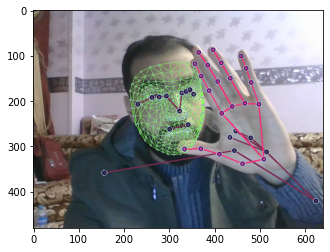

In [15]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [16]:
results.face_landmarks

landmark {
  x: 0.50734496
  y: 0.54465
  z: -0.026495976
}
landmark {
  x: 0.5068915
  y: 0.48911858
  z: -0.05614271
}
landmark {
  x: 0.5033923
  y: 0.5050529
  z: -0.028428737
}
landmark {
  x: 0.4880872
  y: 0.43512374
  z: -0.046504594
}
landmark {
  x: 0.5058852
  y: 0.47232485
  z: -0.06038101
}
landmark {
  x: 0.50198793
  y: 0.44968382
  z: -0.057093177
}
landmark {
  x: 0.4902874
  y: 0.39377093
  z: -0.03123047
}
landmark {
  x: 0.4010289
  y: 0.40338874
  z: -0.005170279
}
landmark {
  x: 0.48424676
  y: 0.35071898
  z: -0.025760163
}
landmark {
  x: 0.48231366
  y: 0.32762742
  z: -0.028917924
}
landmark {
  x: 0.47210208
  y: 0.24371755
  z: -0.02095295
}
landmark {
  x: 0.50788945
  y: 0.5527448
  z: -0.024500512
}
landmark {
  x: 0.5074611
  y: 0.5587841
  z: -0.020566707
}
landmark {
  x: 0.50644547
  y: 0.56106275
  z: -0.015538039
}
landmark {
  x: 0.507048
  y: 0.5627181
  z: -0.012473137
}
landmark {
  x: 0.507996
  y: 0.569272
  z: -0.013924686
}
landmark {
  x: 

In [17]:
len(results.face_landmarks.landmark)

468

In [5]:
def extract_keypoints(results):
    """
    We are extracting our features out of each frame 
    """
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [6]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [7]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
np.array(sequences).shape

(90, 30, 1662)

In [12]:
X = np.array(sequences)

In [13]:
X.shape

(90, 30, 1662)

In [14]:
y = to_categorical(labels).astype(int)

In [15]:
y.shape

(90, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.05)

In [17]:
X_train.shape

(85, 30, 1662)

In [18]:
X_test.shape

(5, 30, 1662)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential([
    LSTM(64 , return_sequences=True ,  activation='relu', input_shape=(30,1662)),
    LSTM(128 , return_sequences=True ,  activation='relu'),
    LSTM(64 , return_sequences=False ,  activation='relu'),
    Dense(64 , activation="relu"),
    Dense(32 , activation="relu"),
    Dense(actions.shape[0] , activation="softmax")
    
])

In [43]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 15s 444ms/step - loss: 5.0209 - categorical_accuracy: 0.3294
Epoch 2/500
3/3 [==============================] - 1s 386ms/step - loss: 1.3115 - categorical_accuracy: 0.2824
Epoch 3/500
3/3 [==============================] - 1s 391ms/step - loss: 1.5199 - categorical_accuracy: 0.3882
Epoch 4/500
3/3 [==============================] - 1s 395ms/step - loss: 2.9534 - categorical_accuracy: 0.3882
Epoch 5/500
3/3 [==============================] - 1s 387ms/step - loss: 1.1214 - categorical_accuracy: 0.3294
Epoch 6/500
3/3 [==============================] - 1s 408ms/step - loss: 1.0393 - categorical_accuracy: 0.4941
Epoch 7/500
3/3 [==============================] - 1s 396ms/step - loss: 0.9523 - categorical_accuracy: 0.4353
Epoch 8/500
3/3 [==============================] - 1s 498ms/step - loss: 0.8823 - categorical_accuracy: 0.5412
Epoch 9/500
3/3 [==============================] - 2s 511ms/step - loss: 0.8883 - categorical_accuracy: 0.4353


3/3 [==============================] - 1s 418ms/step - loss: 1.2663 - categorical_accuracy: 0.4353
Epoch 146/500
3/3 [==============================] - 1s 389ms/step - loss: 1.2118 - categorical_accuracy: 0.3529
Epoch 147/500
3/3 [==============================] - 1s 376ms/step - loss: 1.3760 - categorical_accuracy: 0.3765
Epoch 148/500
3/3 [==============================] - 1s 405ms/step - loss: 1.1620 - categorical_accuracy: 0.3412
Epoch 149/500
3/3 [==============================] - 1s 389ms/step - loss: 1.0772 - categorical_accuracy: 0.3765
Epoch 150/500
3/3 [==============================] - 1s 424ms/step - loss: 1.0793 - categorical_accuracy: 0.4471
Epoch 151/500
3/3 [==============================] - 1s 482ms/step - loss: 1.1718 - categorical_accuracy: 0.4118
Epoch 152/500
3/3 [==============================] - 1s 410ms/step - loss: 1.0343 - categorical_accuracy: 0.4471
Epoch 153/500
3/3 [==============================] - 1s 491ms/step - loss: 1.1012 - categorical_accuracy: 0.51

3/3 [==============================] - 1s 392ms/step - loss: 0.9557 - categorical_accuracy: 0.6353
Epoch 290/500
3/3 [==============================] - 1s 407ms/step - loss: 0.7031 - categorical_accuracy: 0.6353
Epoch 291/500
3/3 [==============================] - 1s 403ms/step - loss: 0.6470 - categorical_accuracy: 0.6941
Epoch 292/500
3/3 [==============================] - 1s 391ms/step - loss: 0.6813 - categorical_accuracy: 0.6353
Epoch 293/500
3/3 [==============================] - 1s 400ms/step - loss: 0.6513 - categorical_accuracy: 0.6353
Epoch 294/500
3/3 [==============================] - 1s 403ms/step - loss: 0.6387 - categorical_accuracy: 0.6471
Epoch 295/500
3/3 [==============================] - 1s 390ms/step - loss: 0.7460 - categorical_accuracy: 0.6706
Epoch 296/500
3/3 [==============================] - 1s 400ms/step - loss: 0.8420 - categorical_accuracy: 0.6235
Epoch 297/500
3/3 [==============================] - 1s 383ms/step - loss: 0.8772 - categorical_accuracy: 0.56

3/3 [==============================] - 1s 268ms/step - loss: 0.3511 - categorical_accuracy: 0.9529
Epoch 434/500
3/3 [==============================] - 1s 286ms/step - loss: 0.3449 - categorical_accuracy: 0.9647
Epoch 435/500
3/3 [==============================] - 1s 293ms/step - loss: 0.3375 - categorical_accuracy: 0.9647
Epoch 436/500
3/3 [==============================] - 1s 260ms/step - loss: 0.3391 - categorical_accuracy: 0.9647
Epoch 437/500
3/3 [==============================] - 1s 250ms/step - loss: 0.3311 - categorical_accuracy: 0.9647
Epoch 438/500
3/3 [==============================] - 1s 271ms/step - loss: 0.3178 - categorical_accuracy: 0.9529
Epoch 439/500
3/3 [==============================] - 1s 206ms/step - loss: 0.3148 - categorical_accuracy: 0.9647
Epoch 440/500
3/3 [==============================] - 1s 256ms/step - loss: 0.3060 - categorical_accuracy: 0.9647
Epoch 441/500
3/3 [==============================] - 1s 202ms/step - loss: 0.3193 - categorical_accuracy: 0.95

In [45]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 569ms/step - loss: 0.4506 - categorical_accuracy: 1.0000


[0.4505789875984192, 1.0]

In [46]:
res= model.predict(X_test)

1/1 [==============================] - 0s 447ms/step


In [47]:
res

array([[0.0071672 , 0.94907796, 0.04375483],
       [0.46553627, 0.03618496, 0.49827883],
       [0.6007998 , 0.00991571, 0.3892845 ],
       [0.6084947 , 0.00879752, 0.38270777],
       [0.6078821 , 0.00924718, 0.3828707 ]], dtype=float32)

In [48]:
actions[np.argmax(res[0])]

'thanks'

In [50]:
actions[np.argmax(y_test[0])]

'thanks'

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [53]:
yhat=model.predict(X_test)
ytrue=np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

1/1 [==============================] - 0s 44ms/step


In [54]:
yhat

[1, 2, 0, 0, 0]

In [55]:
ytrue

[1, 2, 0, 0, 0]

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [57]:
accuracy_score(ytrue,yhat)

1.0

In [58]:
model.save('action.h5')

In [19]:
import tensorflow as tf

In [20]:
model= tf.keras.models.load_model('action.h5')

In [21]:
model.evaluate(X_test ,y_test)

1/1 [==============================] - 1s 825ms/step - loss: 0.3205 - categorical_accuracy: 0.8000


[0.32049140334129333, 0.800000011920929]

In [22]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'med

1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
thanks
<class 'media

1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
